In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

from sklearn.datasets import fetch_california_housing  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  
from sklearn.preprocessing import StandardScaler  
from sklearn.ensemble import GradientBoostingRegressor  



# Data acquisition and initial exploration

In [2]:
housing_bundle = fetch_california_housing(as_frame=True)  
house_matrix = housing_bundle.data  
price_target = housing_bundle.target  

print("Dimensions of housing features:", house_matrix.shape)  
print("Preview of features:\n", house_matrix.head())  
print("Preview of target values:\n", price_target.head())  



Dimensions of housing features: (20640, 8)
Preview of features:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Preview of target values:
 0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [3]:
 housing_bundle

{'data':        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 ...       ...       ...       ...        ...         ...       ...       ...   
 20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
 20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
 20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
 20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
 20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   
 
        Longitude 

# Data Cleaning / Preprocessing  
## Checking for missing values 

In [4]:
print("Missing values by feature:\n", house_matrix.isna().sum()) 

Missing values by feature:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


# Exploratory Data Analysis 

## Correlation heatmap for features vs target 

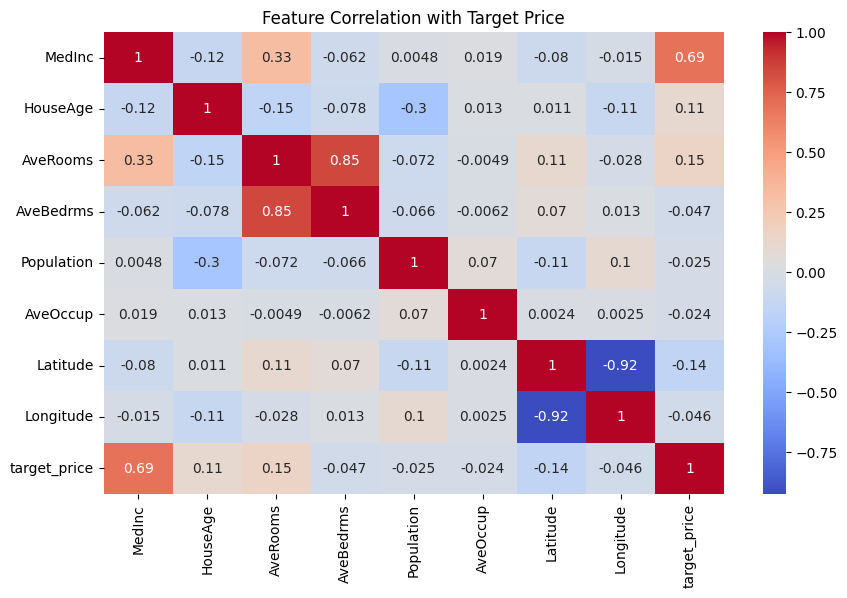

In [5]:
plt.figure(figsize=(10,6))  
correlation_map = house_matrix.copy()  
correlation_map['target_price'] = price_target  
sns.heatmap(correlation_map.corr(), annot=True, cmap='coolwarm')  
plt.title("Feature Correlation with Target Price")  
plt.show() 

# Feature Engineering 

## create a new feature – rooms per household

In [6]:
ring_feature = house_matrix['AveRooms'] / house_matrix['AveOccup']  
house_matrix['RoomDensity'] = ring_feature  

# Feature Scaling (standardization)

In [7]:
scale_processor = StandardScaler()  
scaled_features = scale_processor.fit_transform(house_matrix)  

# Train-Test Split

In [8]:
# train_samples, eval_samples, train_labels, eval_labels = train_test_split(  
#     scaled_features, price_target, test_size=0.3, random_state=99  
# )
 
X_train, X_test, y_train, y_test = train_test_split(scaled_features, price_target, test_size=0.2, random_state=42)  


# build model and evaluation

# Support Vector Regression  


In [9]:
from sklearn.svm import SVR  

model_svr = SVR()  
model_svr.fit(X_train, y_train)  
predictions_svr = model_svr.predict(X_test)  

mse_svr = mean_squared_error(y_test, predictions_svr)  
rmse_svr = np.sqrt(mse_svr)  
mae_svr = mean_absolute_error(y_test, predictions_svr)  
r2_svr = r2_score(y_test, predictions_svr)  

print("Support Vector Regression:")  
print("MSE:", mse_svr)  
print("RMSE:", rmse_svr)  
print("MAE:", mae_svr)  
print("R-squared:", r2_svr)  
  

Support Vector Regression:
MSE: 0.31773950150325414
RMSE: 0.56368386663382
MAE: 0.3772754363055916
R-squared: 0.7575264617541086


# Decision Tree Regression  


In [10]:
from sklearn.tree import DecisionTreeRegressor  

model_dt = DecisionTreeRegressor()  
model_dt.fit(X_train, y_train)  
predictions_dt = model_dt.predict(X_test)  

mse_dt = mean_squared_error(y_test, predictions_dt)  
rmse_dt = np.sqrt(mse_dt)  
mae_dt = mean_absolute_error(y_test, predictions_dt)  
r2_dt = r2_score(y_test, predictions_dt)  

print("Decision Tree Regression:")  
print("MSE:", mse_dt)  
print("RMSE:", rmse_dt)  
print("MAE:", mae_dt)  
print("R-squared:", r2_dt)  
  

Decision Tree Regression:
MSE: 0.4898340213751453
RMSE: 0.6998814337980007
MAE: 0.4513833963178295
R-squared: 0.6261975997503457


# Random Forest Regression  


In [11]:
from sklearn.ensemble import RandomForestRegressor  

model_rf = RandomForestRegressor()  
model_rf.fit(X_train, y_train)  
predictions_rf = model_rf.predict(X_test)  

mse_rf = mean_squared_error(y_test, predictions_rf)  
rmse_rf = np.sqrt(mse_rf)  
mae_rf = mean_absolute_error(y_test, predictions_rf)  
r2_rf = r2_score(y_test, predictions_rf)  

print("Random Forest Regression:")  
print("MSE:", mse_rf)  
print("RMSE:", rmse_rf)  
print("MAE:", mae_rf)  
print("R-squared:", r2_rf)  
  

Random Forest Regression:
MSE: 0.2504225557566846
RMSE: 0.5004223773540554
MAE: 0.3245083818313955
R-squared: 0.8088974053788511


# Elastic Net  


In [12]:
from sklearn.linear_model import ElasticNet  

model_en = ElasticNet()  
model_en.fit(X_train, y_train)  
predictions_en = model_en.predict(X_test)  

mse_en = mean_squared_error(y_test, predictions_en)  
rmse_en = np.sqrt(mse_en)  
mae_en = mean_absolute_error(y_test, predictions_en)  
r2_en = r2_score(y_test, predictions_en)  

print("Elastic Net:")  
print("MSE:", mse_en)  
print("RMSE:", rmse_en)  
print("MAE:", mae_en)  
print("R-squared:", r2_en)  
  

Elastic Net:
MSE: 1.0429810992343893
RMSE: 1.0212644609670842
MAE: 0.8054811214844758
R-squared: 0.2040797059903443


# Lasso Regression  


In [13]:
from sklearn.linear_model import Lasso  

model_lasso = Lasso()  
model_lasso.fit(X_train, y_train)  
predictions_lasso = model_lasso.predict(X_test)  

mse_lasso = mean_squared_error(y_test, predictions_lasso)  
rmse_lasso = np.sqrt(mse_lasso)  
mae_lasso = mean_absolute_error(y_test, predictions_lasso)  
r2_lasso = r2_score(y_test, predictions_lasso)  

print("Lasso Regression:")  
print("MSE:", mse_lasso)  
print("RMSE:", rmse_lasso)  
print("MAE:", mae_lasso)  
print("R-squared:", r2_lasso)  
  

Lasso Regression:
MSE: 1.3106960720039365
RMSE: 1.1448563543099792
MAE: 0.9060685490007149
R-squared: -0.00021908714592466794


# Ridge Regression  


In [14]:
from sklearn.linear_model import Ridge  

model_ridge = Ridge()  
model_ridge.fit(X_train, y_train)  
predictions_ridge = model_ridge.predict(X_test)  

mse_ridge = mean_squared_error(y_test, predictions_ridge)  
rmse_ridge = np.sqrt(mse_ridge)  
mae_ridge = mean_absolute_error(y_test, predictions_ridge)  
r2_ridge = r2_score(y_test, predictions_ridge)  

print("Ridge Regression:")  
print("MSE:", mse_ridge)  
print("RMSE:", rmse_ridge)  
print("MAE:", mae_ridge)  
print("R-squared:", r2_ridge)  


Ridge Regression:
MSE: 0.47239174331254963
RMSE: 0.6873076045793104
MAE: 0.4958882848769569
R-squared: 0.6395081603098516


# Gradient Boosting Regression  


In [15]:
from sklearn.ensemble import GradientBoostingRegressor  

model_gb = GradientBoostingRegressor()  
model_gb.fit(X_train, y_train)  
predictions_gb = model_gb.predict(X_test)  

mse_gb = mean_squared_error(y_test, predictions_gb)  
rmse_gb = np.sqrt(mse_gb)  
mae_gb = mean_absolute_error(y_test, predictions_gb)  
r2_gb = r2_score(y_test, predictions_gb)  

print("Gradient Boosting Regression:")  
print("MSE:", mse_gb)  
print("RMSE:", rmse_gb)  
print("MAE:", mae_gb)  
print("R-squared:", r2_gb)  
 

Gradient Boosting Regression:
MSE: 0.28809218249222807
RMSE: 0.5367421936947272
MAE: 0.36615605993236183
R-squared: 0.7801509396868109


# K-Nearest Neighbors Regression  


In [16]:
from sklearn.neighbors import KNeighborsRegressor  

model_knn = KNeighborsRegressor()  
model_knn.fit(X_train, y_train)  
predictions_knn = model_knn.predict(X_test)  

mse_knn = mean_squared_error(y_test, predictions_knn)  
rmse_knn = np.sqrt(mse_knn)  
mae_knn = mean_absolute_error(y_test, predictions_knn)  
r2_knn = r2_score(y_test, predictions_knn)  

print("K-Nearest Neighbors Regression:")  
print("MSE:", mse_knn)  
print("RMSE:", rmse_knn)  
print("MAE:", mae_knn)  
print("R-squared:", r2_knn)  
  

K-Nearest Neighbors Regression:
MSE: 0.35360301577380326
RMSE: 0.5946452856735713
MAE: 0.3962784578488372
R-squared: 0.7301582775718753


# Linear Regression  


In [17]:
 
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  
  


model_lr = LinearRegression()  
model_lr.fit(X_train, y_train)  
predictions_lr = model_lr.predict(X_test)  

mse_lr = mean_squared_error(y_test, predictions_lr)  
rmse_lr = np.sqrt(mse_lr)  
mae_lr = mean_absolute_error(y_test, predictions_lr)  
r2_lr = r2_score(y_test, predictions_lr)  
adjusted_r2_lr = 1 - (1 - r2_lr) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)  

print("Linear Regression:")  
print("MSE:", mse_lr)  
print("RMSE:", rmse_lr)  
print("MAE:", mae_lr)  
print("R-squared:", r2_lr)  


Linear Regression:
MSE: 0.47239186788926496
RMSE: 0.6873076952059135
MAE: 0.49588593473541576
R-squared: 0.639508065242802


# Polynomial Regression  


In [18]:
from sklearn.preprocessing import PolynomialFeatures  
from sklearn.pipeline import make_pipeline  

degree = 2  
model_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())  
model_poly.fit(X_train, y_train)  
predictions_poly = model_poly.predict(X_test)  

mse_poly = mean_squared_error(y_test, predictions_poly)  
rmse_poly = np.sqrt(mse_poly)  
mae_poly = mean_absolute_error(y_test, predictions_poly)  
r2_poly = r2_score(y_test, predictions_poly)  

print("Polynomial Regression:")  
print("MSE:", mse_poly)  
print("RMSE:", rmse_poly)  
print("MAE:", mae_poly)  
print("R-squared:", r2_poly)  
 

Polynomial Regression:
MSE: 0.39797535248174637
RMSE: 0.630852877049591
MAE: 0.4398294223767914
R-squared: 0.6962968362625302


## Based on evaluation metrics - I chose random forest because it has the lowest errors and highest R2 that means it really fit the data.

# Model Tuning - Hyperparameter Grid Search 

In [19]:

param_grid = {  
    'n_estimators': [50, 100,200],  
    'max_depth': [10, 25, None, 30],  
    'max_features': ['auto', 'sqrt'],  
}  
 
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid,   
                             cv=5, n_jobs=-1, verbose=0, scoring='neg_mean_squared_error')  
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_  
best_score = -grid_search.best_score_   

print("Best Parameters:", best_params)  
print("Best Cross-Validation MSE:", best_score)  

/opt/anaconda3/envs/ACM1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ACM1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/ACM1/lib/python3.12/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/ACM1/lib/python3.12/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File

Best Parameters: {'max_depth': 25, 'max_features': 'sqrt', 'n_estimators': 200}
Best Cross-Validation MSE: 0.25174704659039754


# Evaluation of Best Model

In [20]:
best_rf = grid_search.best_estimator_  
predictions_best_rf = best_rf.predict(X_test)  

 
mse_best_rf = mean_squared_error(y_test, predictions_best_rf)  
rmse_best_rf = np.sqrt(mse_best_rf)  
mae_best_rf = mean_absolute_error(y_test, predictions_best_rf)  
r2_best_rf = r2_score(y_test, predictions_best_rf)  

print("Test MSE:", mse_best_rf)  
print("Test RMSE:", rmse_best_rf)  
print("Test MAE:", mae_best_rf)  
print("Test R-squared:", r2_best_rf)  


Test MSE: 0.2493338327445521
Test RMSE: 0.4993333883734915
Test MAE: 0.32834594507567333
Test R-squared: 0.8097282322658845


# Visualizing Predictions vs True Prices 

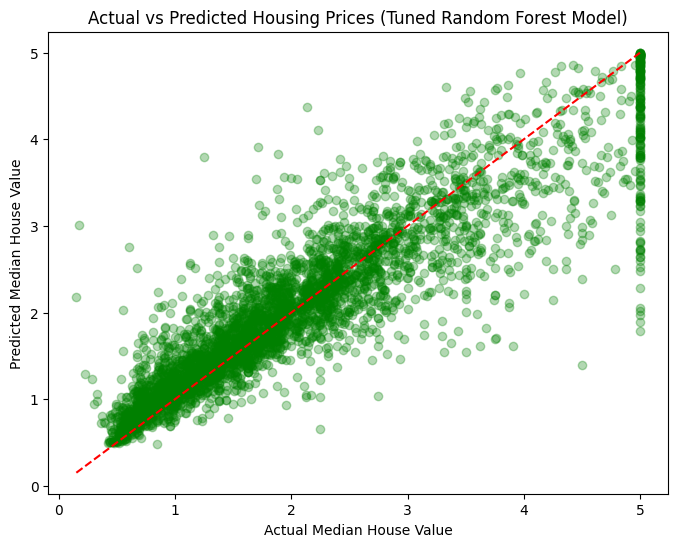

In [21]:
plt.figure(figsize=(8, 6))  
plt.scatter(y_test, predictions_best_rf, alpha=0.3, color='green')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  
plt.xlabel("Actual Median House Value")  
plt.ylabel("Predicted Median House Value")  
plt.title("Actual vs Predicted Housing Prices (Tuned Random Forest Model)")  
plt.show()  